# 1장 벡터, 행렬 그리고 배열

Numpy  


*   벡터(Vector)와 행렬(Matrix)와 텐서와 같은 데이터 구조에서 효율적인 연산을 제공  
*   일반 List에 비해 빠르고, 메모리를 효율적으로 사용한다.  
*   반복문 없이 데이터 배열에 대한 처리를 지원하여 빠르고 편리하다.
*   선형대수와 관련된 다양한 기능을 제공한다.


Numpy를 사용해야 하는 이유   


*   일단 파이썬에는 배열(array)을 지원하지 않는다. 
*   list와 array는 다르다.  
array는 정적할당  -- 고정된 크기를 갖는다  size  변경하려면 기존의 array를 삭제하고 새로운 array를 생성해야 한다.
list는 동적할당  -- 계속 크기가 변할 수 있다.




## 1.1 벡터 만들기

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

In [ ]:
np.__version__

'1.18.5'

In [ ]:
# 하나의 행으로 벡터를 만듭니다.
vector_row = np.array([1, 2, 3])

In [ ]:
vector_row

array([1, 2, 3])

In [ ]:
# 하나의 열로 벡터를 만듭니다.
vector_column = np.array([[1],
                          [2],
                          [3]])

In [ ]:
vector_column

array([[1],
       [2],
       [3]])


*   Numpy 배열은 ndrarray 클래스의 객체이다.  

In [ ]:
# 넘파이 배열의 클래스를 출력합니다.
print(type(vector_row))

<class 'numpy.ndarray'>


## 1.2 행렬 만들기



*   열이 2개 행이 3개인 2차원 행렬 
*   열에는 1열은 1 2열은 2로 채운다.



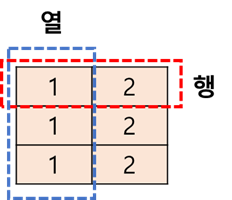


In [ ]:

import numpy as np
#2차원 배열 만들기     2차원배열 = 행렬
matrix = np.array([[1, 2],
                   [1, 2],
                   [1, 2]])
matrix

array([[1, 2],
       [1, 2],
       [1, 2]])

In [ ]:
#mat()함수는 행렬 객체가 아니라 배열을 반환한다. 별로 사용하지 않는다.

matrix_object = np.mat([[1, 2],
                        [1, 2],
                        [1, 2]])
matrix_object

matrix([[1, 2],
        [1, 2],
        [1, 2]])

In [ ]:
# 임의의 값이 채워진 배열을 만듭니다.
empty_matrix = np.empty((3, 2))
empty_matrix

array([[2.10937256e-316, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000]])

In [ ]:
#zero() 만들어진 행렬에 0으로만 채운다.
zero_matrix = np.zeros((3, 2))
zero_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
#ones() 만들어진 행렬에 1로만 채운다.
one_matrix = np.ones((3, 2))
one_matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# 0 행렬을 만든 후 7을 더합니다.
seven_matrix = np.zeros((3, 2)) + 7
# full() 함수를 사용하는 것이 효율적입니다.
seven_matrix = np.full((3, 2), 7)
seven_matrix

array([[7, 7],
       [7, 7],
       [7, 7]])

## 1.3 희소 행렬 만들기

희소행렬 (sparse matrix)

데이터에 0이 아닌 값이 매우 적을 때 이를 효율적으로 표현하기 위해 사용 
일반적으로  NLP에서 단어를 벡터화 시켰을 때  
정형데이터에는 더미 변수로 만들 때 많이 사용합니다.  

또는 one-hot-encoding 처럼 (*단어--> 벡터화 --> 단어들에 해당하는 열만 1을 가지게 하는 것)  

이런 구조를 Spare하다고 한다.  


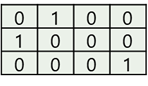


In [ ]:
#희소행렬 만들기 1)
eye = np.eye(3)
eye

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#희소행렬 만들기 2)
import numpy as np
from scipy import sparse # scipy의 sparse를 import 해줘야 함

# 행렬을 만듭니다. 
matrix = np.array([[0, 0],
                   [0, 1],
                   [3, 0]])

print(matrix)

[[0 0]
 [0 1]
 [3 0]]


#### 희소행렬 종류  




##### 1) CSR (Compressed Spare Row)  
*   압축 해서 저장한다.
*   0이 많으면 압축률이 좋다. 
*   데이터의 좌표값을 보여준다.


CSR 행렬 예제 1)

In [5]:
import numpy as np
from scipy import sparse
# 큰 행렬을 만듭니다.
matrix_large = np.array([[0, 0, 0],
                         [0, 1, 0],
                         [3, 0, 0]])

# CSR 행렬을 만듭니다.
matrix_large_sparse = sparse.csr_matrix(matrix_large)

# 원래 희소 행렬을 출력합니다.
print(matrix_large_sparse)  # 출력되는 값은 위치값과 해당 값이 출력 된다.

  (1, 1)	1
  (2, 0)	3


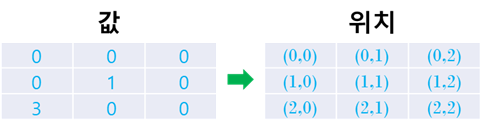


CSR 행렬 예제 2)

In [6]:
# (data, (row_index, col_index))로 구성된 튜플을 전달합니다.
# shape 매개변수에서 0을 포함한 행렬의 전체 크기를 지정합니다.  
matrix_sparse_2 = sparse.csr_matrix(([1, 3], ([1, 2], [1, 0])), shape=(3, 10))

print(matrix_sparse_2)

  (1, 1)	1
  (2, 0)	3


In [7]:
#희소행렬을 dense array로 전환해서 보려면 toarray()를 사용하면 된다.
print(matrix_sparse_2.toarray()) 

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]]


In [ ]:
#아까 만든 np.matrix형태의 객체로 만드는 코드
matrix_sparse_2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

##### 2) CSC (Compressed Spare Coulmn)  
*   압축 해서 저장한다.
*   0이 많으면 압축률이 좋다. 
*   3 개의 Numpy 배열을 이용(indices , indptr , data)  
*   indices는 행 인덱스 배열  
*   data는 0이 아닌 값의 배열  
*   indptr은 인덱스 및 데이터에서 열 시작을 가르킨다.  
*   fast matrix vector products and other arithmetics (sparsetools)  

In [8]:
import numpy as np
from scipy import sparse
mtx = sparse.csc_matrix((3, 4), dtype=np.int8)
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

In [14]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csc_matrix((data, (row, col)), shape=(3, 3))
mtx  

print(mtx.todense())  

print("data", mtx.data)

print("indices", mtx.indices)
  
print("indptr", mtx.indptr)


[[1 0 2]
 [0 0 3]
 [4 5 6]]
data [1 4 5 2 3 6]
indices [0 2 2 0 1 2]
indptr [0 2 3 6]


##### 2) DOK (Dictionary of Keys)  
*   좌표가 key 원소 값이 valure인 딕셔너리 구조
*   희소 행렬을 점진적으로 구성하는데 효율적

In [8]:
from scipy.sparse import dok_matrix

#값이 0으로 채워진 3,4크기의 행렬을 만듭니다. 
#그런데.. zeros()얘와 무슨 차이가 있다는거지..-_-
dok = dok_matrix((3,4))
dok[0,1] = 4
dok[2,3] = 9

dok.toarray()


array([[0., 4., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.]])

In [6]:
import numpy as np
from scipy.sparse import dok_matrix
S = dok_matrix((5, 5), dtype=np.float32)
print(S)

for i in range(5):
    for j in range(5):
        S[i, j] = i + j 
S

S.todense()

matrix([[0., 1., 2., 3., 4.],
        [1., 2., 3., 4., 5.],
        [2., 3., 4., 5., 6.],
        [3., 4., 5., 6., 7.],
        [4., 5., 6., 7., 8.]], dtype=float32)

## 1.4 원소 선택

벡터나 행렬에서 원소를 하나 이상 선택하기  

In [17]:
import numpy as np

# 행 벡터를 만듭니다.
vector = np.array([1, 2, 3, 4, 5, 6])

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# vector의 세 번째 원소를 선택합니다.
vector[2]

3


파이썬 인덱스는 0부터 시작 한다.

In [18]:
# matrix의 두 번째 행, 두 번째 열의 원소를 선택합니다.
matrix[1,1]

5

In [19]:
# 벡터에 있는 모든 원소를 선택합니다.
vector[:]

array([1, 2, 3, 4, 5, 6])

In [20]:
# 세 번째 원소를 포함하여 그 이전의 모든 원소를 선택합니다.
vector[:3]

array([1, 2, 3])

In [21]:
# 세 번째 이후의 모든 원소를 선택합니다.
vector[3:]

array([4, 5, 6])

In [22]:
# 마지막 원소를 선택합니다.
vector[-1]

6

In [23]:
# 행렬에서 첫 번째 두 개의 행과 모든 열을 선택합니다.
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
# 모든 행과 두 번째 열을 선택합니다.
matrix[:,1:2]

array([[2],
       [5],
       [8]])

In [25]:
# 첫 번째 행과 세 번째 행을 선택합니다.
matrix[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [26]:
# (0, 1), (2, 0) 위치의 원소를 선택합니다.
matrix[[0,2], [1,0]]

array([2, 7])

#### 팬시 인덱싱 fancy indexing  
 팬시 인덱싱은 정수나 불린(Boolean) 값을 가지는 다른 Numpy 배열로 배열을 인덱싱할 수 있는 기능을 의미합니다.

In [27]:
# matrix의 각 원소에 비교 연산자가 적용됩니다.
mask = matrix > 5

mask

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [28]:
# 불리언 마스크 배열을 사용하여 원소를 선택합니다.
matrix[mask]

array([6, 7, 8, 9])

## 1.5 행렬 정보 확인  


*   행렬 크기 shape()
*   행렬 원소 개수 size() 
*   행렬 차원 ndim()   
*   원소의 데이터 타입 변수.dtype  
*   원소 하나가 차지하는 바이크 크기 행렬.itemsize  
*   행렬.nbytes  



In [29]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

# 행렬의 크기를 확인합니다.
matrix.shape

(3, 4)

In [30]:
# 행렬의 원소 개수를 확인합니다(행 * 열).
matrix.size

12

In [32]:
# 차원 수를 확인합니다.
matrix.ndim

2

In [33]:
# 원소의 데이터 타입을 확인합니다.
print(matrix.dtype)

int64


In [34]:
# 원소 하나가 차지하는 바이트 크기입니다. 
print(matrix.itemsize)

8


In [35]:
# 배열 전체가 차지하는 바이트 크기입니다.
print(matrix.nbytes)

96


## 1.6 벡터화 연산 적용하기

#### 벡터화  np.vectorize()

In [38]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 100을 더하는 함수를 만듭니다.
add_100 = lambda i: i + 100

# 벡터화된 함수를 만듭니다.
vectorized_add_100 = np.vectorize(add_100)

# 행렬의 모든 원소에 함수를 적용합니다.
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

#### 브로드캐스팅 broadcasting  
   넘파이 배열은 차원이 달라도 배열 간의 연산을 수행 할 수 있다. 이것을 브로드캐스팅이라 한다.  

In [36]:
# 모든 원소에 100을 더합니다.
matrix + 100

array([[101, 102, 103, 104],
       [105, 106, 107, 108],
       [109, 110, 111, 112]])

In [39]:
# (3, 3) 크기 행렬에 (3, ) 벡터를 더하면 
# (1, 3) 크기가 된다음 행을 따라 반복됩니다.
matrix + [100, 100, 100]

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [40]:
# (3, 3) 크기 행렬에 (3, 1) 벡터를 더하면 열을 따라 반복됩니다.
matrix + [[100], [100], [100]]

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

## 1.7 최댓값, 최솟값 찾기  
*   최솟값 min()
*   최댓값 max()  



In [41]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 가장 큰 원소를 반환합니다.
np.max(matrix)

9

In [42]:
# 가장 작은 원소를 반환합니다.
np.min(matrix)

1

In [43]:
# 각 열에서 최댓값을 찾습니다.
np.max(matrix, axis=0)

array([7, 8, 9])

In [44]:
# 각 행에서 최댓값을 찾습니다.
np.max(matrix, axis=1)

array([3, 6, 9])

In [45]:
# 이전 예와 달리 (3, 1) 크기의 열 벡터가 만들어 집니다.
vector_column = np.max(matrix, axis=1, keepdims=True)

vector_column

array([[3],
       [6],
       [9]])

keepdims = True  
원본 배열의 차원과 동일한 결과를 만듭니다.  


In [46]:
# 열 벡터이므로 브로드캐스팅을 이용하여 각 행의 최댓값을 뺄 수 있습니다.
matrix - vector_column

array([[-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0]])

## 1.8 평균, 분산, 표준 편차 계산하기  


> 평균 mean()  
> 분산 var()  
> 표준 편차 std()  



In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 평균을 반환합니다.
np.mean(matrix)

5.0

In [47]:
# 분산을 반환합니다.
np.var(matrix)

6.666666666666667

In [48]:
# 표준 편차를 반환합니다.
np.std(matrix)

2.581988897471611

In [49]:
# 각 열의 평균을 계산합니다.
np.mean(matrix, axis=0)

array([4., 5., 6.])

In [50]:
#ddof=1 자유도(degree of freedom) 설정 

np.std(matrix, ddof=1)

2.7386127875258306

In [51]:
import pandas as pd

df = pd.DataFrame(matrix.flatten())
df.std()

0    2.738613
dtype: float64

## 1.9 배열 크기 바꾸기

> reshape는 데이터를 동일하게 유지하면서 배열의 구조를 변경하여 행과 열의 수를 다르게 변경 할 수 있다. 
> 그치만 원소의 개수는 같아야 한다   

In [52]:
# 라이브러리를 임포트합니다.
import numpy as np

# 4x3 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# 2x6 행렬로 크기를 바꿉니다.
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [53]:
matrix.size

12

In [54]:
matrix.reshape(1, -1) #reshape -1은 가능한 많이. 행 하나에 가능한 많이 넣어라 

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [55]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [60]:
matrix.reshape(-1) # 1차원 배열로 바꾸어 줍니다. 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [61]:
matrix.ravel() # = matrix.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## 1.10 벡터나 행렬을 전치하기

#### 전치(transpose)  
- 원소의 행과 열의 인덱스를 바꾼다.  

In [63]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 전치합니다.
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [64]:
# 벡터를 전치합니다.
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

In [65]:
# 행 벡터를 전치합니다.
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [66]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [67]:
# 2x3x2 행렬을 만듭니다.
matrix = np.array([[[ 1,  2],
                    [ 3,  4],
                    [ 5,  6]],

                   [[ 7,  8],
                    [ 9, 10],
                    [11, 12]]])

# 두 번째와 세 번째 차원을 바꾸어 2x2x3 행렬로 만듭니다.
matrix.transpose((0, 2, 1))

array([[[ 1,  3,  5],
        [ 2,  4,  6]],

       [[ 7,  9, 11],
        [ 8, 10, 12]]])

## 1.11 행렬 펼치기 flatten()

reshape(): 원본 배열이 변경  
flatten(): 새로운 배열 생성  

In [72]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 펼칩니다.
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [74]:
vector_reshaped = matrix.reshape(-1)
vector_flattened = matrix.flatten()

# (0, 0) 위치의 원소를 바꿉니다.
matrix[0][0] = -1

# 배열의 뷰는 원본 배열의 변경 사항을 반영합니다.
vector_reshaped

array([-1,  2,  3,  4,  5,  6,  7,  8,  9])

In [75]:
# 복사된 배열에는 영향이 미치지 않습니다.
vector_flattened

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## 1.12 행렬의 랭크 구하기

- 행렬의 랭크는 선형 독립적인 행 또는 열 개수   
- matrix_rank 함수는 특잇값 분해 (singluar value decomposition) 방식으로 랭크 값 계산  

In [79]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(matrix)

2

In [80]:
# 2D 배열이므로 2가 반환됩니다.
np.ndim(matrix)

2

In [81]:
# svd 함수로 특잇값만 계산합니다.
s = np.linalg.svd(matrix, compute_uv=False)
# 오차를 고려하여 0에 가까운 아주 작은 값을 지정합니다.
np.sum(s > 1e-10)

2

## 1.13 행렬식 계산하기



> 행렬A = [[a,b],[c,d]]
> det(A) = ad - bc로 계산  


In [82]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 행렬의 행렬식을 반환합니다.
np.linalg.det(matrix)

0.0

## 1.14 행렬의 대각 원소 추출하기 diagonal()

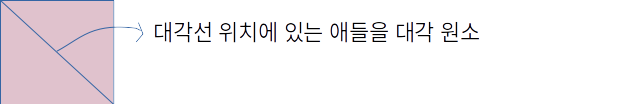


In [83]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각 원소를 반환합니다.
matrix.diagonal()

array([1, 4, 9])

In [96]:
# 반환된 배열을 변경하려면 복사해야 합니다.
a = matrix.diagonal().copy()

In [97]:
a = np.diag(matrix)
print(a)

[1 4 9]


In [98]:
# 1차원 배열이 주어지면 2차원 대각행렬을 만듭니다.
np.diag(a)

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

#### 행렬의 대각합 계산

In [99]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각합을 반환합니다.
matrix.trace()

14

In [100]:
# 대각 원소를 사용하여 합을 구합니다.
sum(matrix.diagonal())

14

In [103]:
# 주 대각선 하나 위의 대각 원소의 합을 반환합니다.
matrix.trace(offset=1)

8

In [104]:
# 주 대각선 하나 아래의 대각 원소의 합을 반환합니다.
matrix.trace(offset=-1)

10

## 1.15 고윳값과 고유벡터 찾기

고유벡터는 스테일만 바뀌는 벡터 (방향 변화X)  

$\mathbf {A x} = \lambda \mathbf x$ 

을 만족하는 벡터  x  와 스칼라 값  λ  를 각각 고유벡터(eigenvector), 고유값(eigenvalue)이라 한다.


In [108]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, -1, 3],
                   [1, 1, 6],
                   [3, 8, 9]])

# 고윳값과 고유벡터를 계산합니다.
eigenvalues, eigenvectors = np.linalg.eig(matrix)
# 고윳값을 확인합니다.
eigenvalues

array([13.55075847,  0.74003145, -3.29078992])

In [109]:
# 고유벡터를 확인합니다.
eigenvectors

array([[-0.17622017, -0.96677403, -0.53373322],
       [-0.435951  ,  0.2053623 , -0.64324848],
       [-0.88254925,  0.15223105,  0.54896288]])

In [110]:
# 대칭 행렬을 만듭니다.
matrix = np.array([[1, -1, 3],
                   [-1, 1, 6],
                   [3, 6, 9]])

# 고윳값과 고유벡터를 계산합니다.
eigenvalues, eigenvectors = np.linalg.eigh(matrix)

## 1.16 내적 계산 dot product

$\vec{a}\cdot\vec{b}$  

내적  = 벡터의 방향이 얼마나 일치하는 지의 용도


In [119]:
# 라이브러리를 임포트합니다.
import numpy as np

# 두 벡터를 만듭니다.
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

# 점곱을 계산합니다.
np.dot(vector_a, vector_b)

32

In [116]:
scalar_a = np.array(1)
scalar_b = np.array(2)

In [117]:
np.dot(scalar_a, scalar_b)

2

## 1.17 행렬 덧셈과 뺄셈 

In [120]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 1],
                     [1, 3, 8]])

# 두 행렬을 더합니다.
np.add(matrix_a, matrix_b)

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

In [121]:
# 두 행렬을 뺍니다.
np.subtract(matrix_a, matrix_b)

array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

In [122]:
# 두 행렬을 더합니다.
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

## 1.18 행렬 곱셈

In [123]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1],
                     [1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3],
                     [1, 2]])

# 두 행렬을 곱합니다.
np.dot(matrix_a, matrix_b)

array([[2, 5],
       [3, 7]])

In [124]:
# 두 행렬을 곱합니다.
matrix_a @ matrix_b

array([[2, 5],
       [3, 7]])

In [125]:
# 두 행렬의 원소별 곱셈을 수행합니다.
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

In [126]:
a = np.random.rand(2, 1, 4, 5)
b = np.random.rand(1, 3, 5, 6)

np.dot(a, b).shape

(2, 1, 4, 1, 3, 6)

In [127]:
np.matmul(a, b).shape

(2, 3, 4, 6)

## 1.19 역행렬

In [128]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 4],
                   [2, 5]])

# 역행렬을 계산합니다.
np.linalg.inv(matrix)

array([[-1.66666667,  1.33333333],
       [ 0.66666667, -0.33333333]])

In [129]:
# 행렬과 역행렬을 곱합니다.
matrix @ np.linalg.inv(matrix)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [130]:
matrix = np.array([[1, 4, 7],
                   [2, 5, 8]])

# 유사 역행렬을 계산합니다.
np.linalg.pinv(matrix)

array([[-1.16666667,  1.        ],
       [-0.33333333,  0.33333333],
       [ 0.5       , -0.33333333]])

## 1.20 난수 생성

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 초깃값을 지정합니다.
np.random.seed(0)

# 0.0과 1.0 사이에서 세 개의 실수 난수를 생성합니다.
np.random.random(3)

array([0.5488135 , 0.71518937, 0.60276338])

In [ ]:
# 1과 10 사이에서 세 개의 정수 난수를 생성합니다.
np.random.randint(0, 11, 3)

array([3, 7, 9])

In [ ]:
# 평균이 0.0이고 표준 편차가 1.0인 정규 분포에서 세 개의 수를 뽑습니다.
np.random.normal(0.0, 1.0, 3)

array([-1.42232584,  1.52006949, -0.29139398])

In [ ]:
# 평균이 0.0이고 스케일이 1.0인 로지스틱 분포에서 세 개의 수를 뽑습니다.
np.random.logistic(0.0, 1.0, 3)

array([-0.98118713, -0.08939902,  1.46416405])

In [ ]:
# 1.0보다 크거나 같고 2.0보다 작은 세 개의 수를 뽑습니다.
np.random.uniform(1.0, 2.0, 3)

array([1.47997717, 1.3927848 , 1.83607876])

In [ ]:
# 0.0(포함)과 1.0 사이에서 세 개의 실수 난수를 생성합니다.
# np.random.random((2, 3)), np.random.sample((2, 3)), 
# np.random.uniform(0.0, 1.0, (2, 3))과 동일합니다.
np.random.random_sample((2, 3))

array([[0.33739616, 0.64817187, 0.36824154],
       [0.95715516, 0.14035078, 0.87008726]])

In [ ]:
# np.random.random_sample((2, 3))과 동일합니다.
np.random.rand(2, 3)

array([[0.47360805, 0.80091075, 0.52047748],
       [0.67887953, 0.72063265, 0.58201979]])

In [ ]:
np.random.randint(0, 1, 10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# np.random.normal(0.0, 1.0, (2, 3))과 동일합니다.
np.random.standard_normal((2, 3))

array([[-0.13309028,  1.59456053,  0.23043417],
       [-0.06491034, -0.96898025,  0.59124281]])

In [ ]:
# np.random.normal(0.0, 1.0, (2, 3))과 동일합니다.
np.random.randn(2, 3)

array([[-0.7827755 , -0.44423283, -0.34518616],
       [-0.88180055, -0.44265324, -0.5409163 ]])

In [ ]:
# 0~2 사이의 정수 중 랜덤하게 10번을 뽑습니다.
# np.random.choice(3, 5)와 동일합니다.
np.random.choice([0,1,2], 5)

array([0, 1, 2, 2, 0])

In [ ]:
a = np.array([0, 1, 2, 3, 4])
np.random.shuffle(a)
a

array([0, 2, 3, 4, 1])

In [ ]:
# a는 변경되지 않습니다.
np.random.permutation(a)

array([2, 0, 1, 3, 4])

In [ ]:
np.random.permutation(5)

array([4, 1, 2, 0, 3])